### Data Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

In [45]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### there is not nulls

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df_no_id = df.drop(columns=['customerID'])

In [11]:
duplicates_count = df_no_id.duplicated().sum()
print(duplicates_count)

22


In [49]:
df_no_id[df_no_id.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.7,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.9,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.2,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.6,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.2,Yes


In [12]:
df = df.replace(" ", np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [13]:
missing_counts = df.isnull().sum()
print(missing_counts)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [14]:
df = df.dropna(subset=['TotalCharges'])
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

###  Customer Churn Analysis ### 

In [16]:
churn_count = df[df['Churn'] == 'Yes']

In [17]:
len(churn_count)

1869

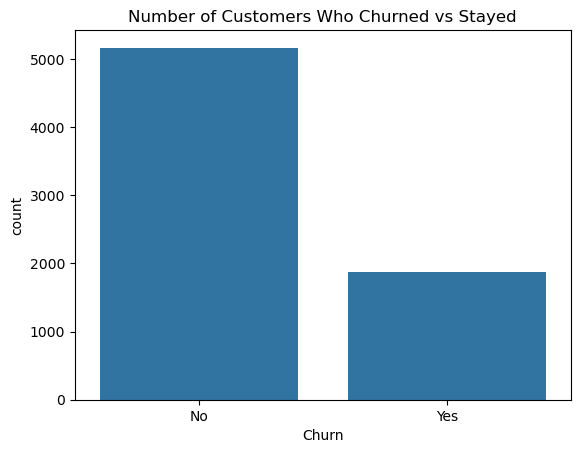

In [18]:
sns.countplot(x='Churn', data=df)
plt.title("Number of Customers Who Churned vs Stayed")
plt.show()

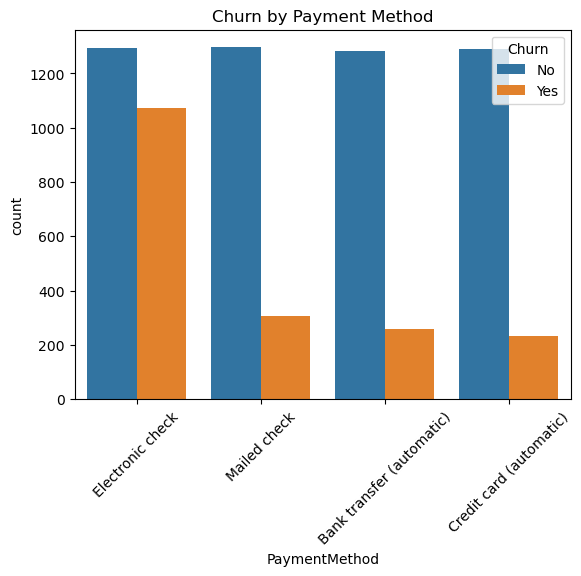

In [19]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)
plt.show()

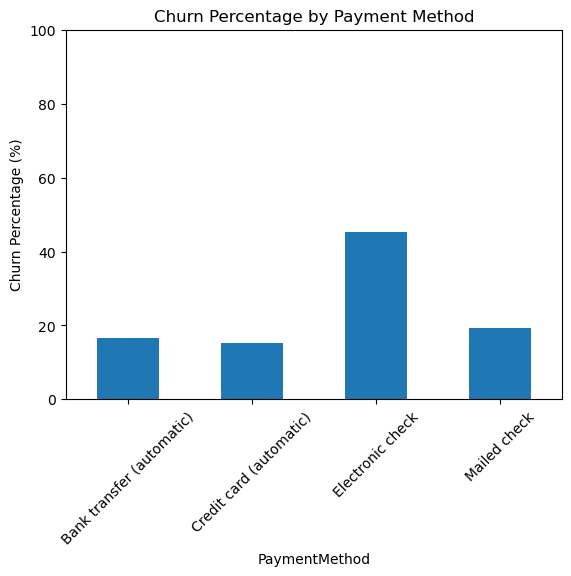

In [20]:
# Create a table of counts for PaymentMethod vs Churn
payment_types = df.groupby('PaymentMethod')['Churn'].value_counts().unstack().fillna(0)

# Calculate churn percentage for each PaymentMethod
churn_percentage = (payment_types['Yes'] / payment_types.sum(axis=1)) * 100

churn_percentage.plot(kind='bar')
plt.ylabel("Churn Percentage (%)")
plt.title("Churn Percentage by Payment Method")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()


In [21]:
types = df.groupby(['InternetService', 'Churn']).size().unstack()

In [22]:
types

Churn,No,Yes
InternetService,,
DSL,1957,459
Fiber optic,1799,1297
No,1407,113


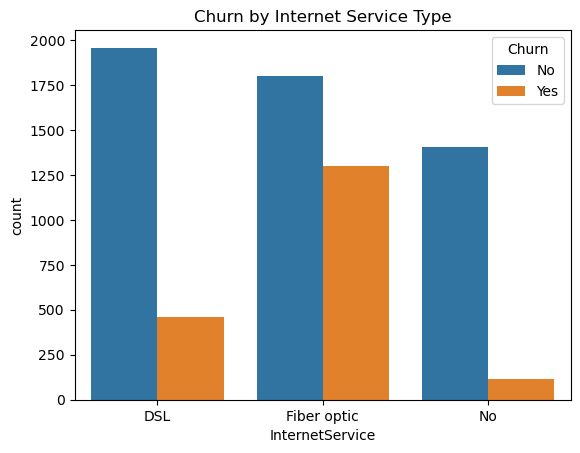

In [23]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn by Internet Service Type")
plt.show()

In [24]:
churn_percentage = (types['Yes'] / types.sum(axis=1)) * 100

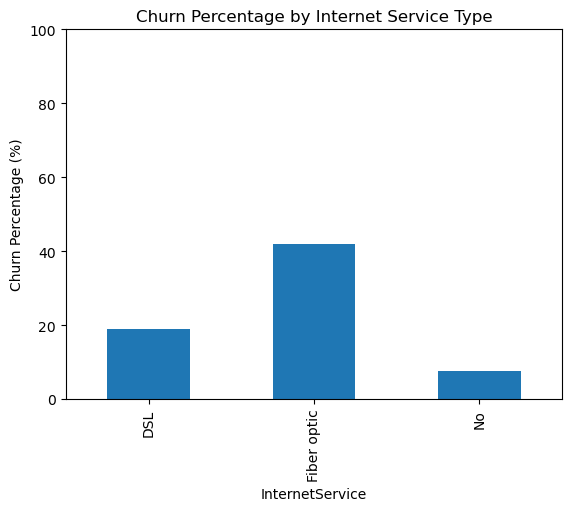

In [25]:
churn_percentage.plot(kind = 'bar',)
plt.ylabel("Churn Percentage (%)")
plt.title("Churn Percentage by Internet Service Type")
plt.ylim(0, 100)
plt.show()

<Axes: xlabel='Contract', ylabel='count'>

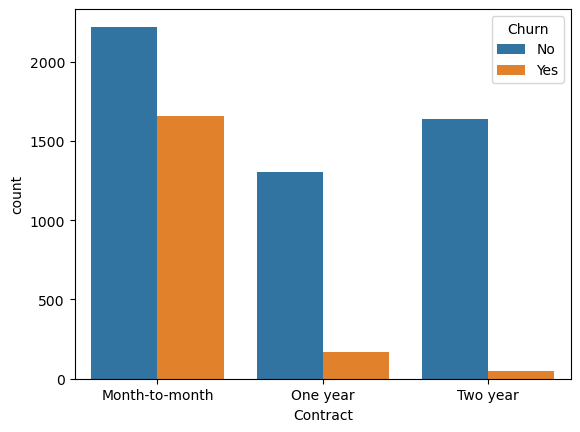

In [26]:
sns.countplot(data=df, x='Contract', hue='Churn')

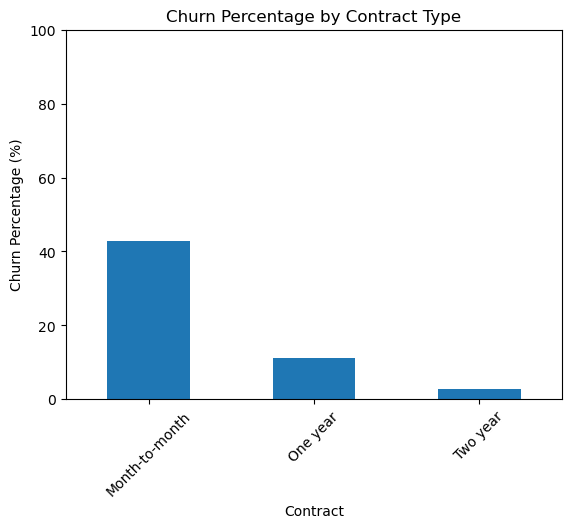

In [27]:
# Create a table of counts for Contract vs Churn
contract_types = df.groupby('Contract')['Churn'].value_counts().unstack().fillna(0)

# Calculate churn percentage for each Contract type
churn_percentage = (contract_types['Yes'] / contract_types.sum(axis=1)) * 100

churn_percentage.plot(kind='bar')
plt.ylabel("Churn Percentage (%)")
plt.title("Churn Percentage by Contract Type")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='tenure', ylabel='Count'>

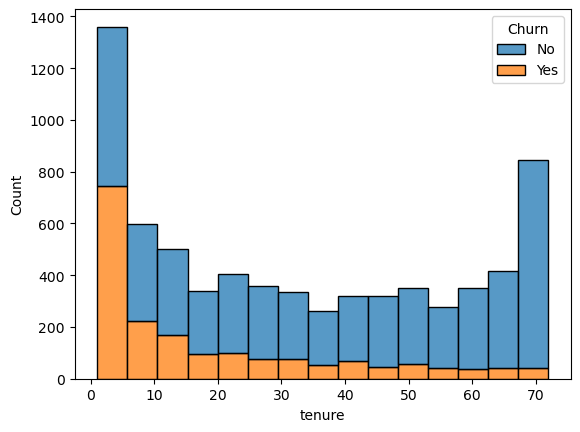

In [28]:
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')

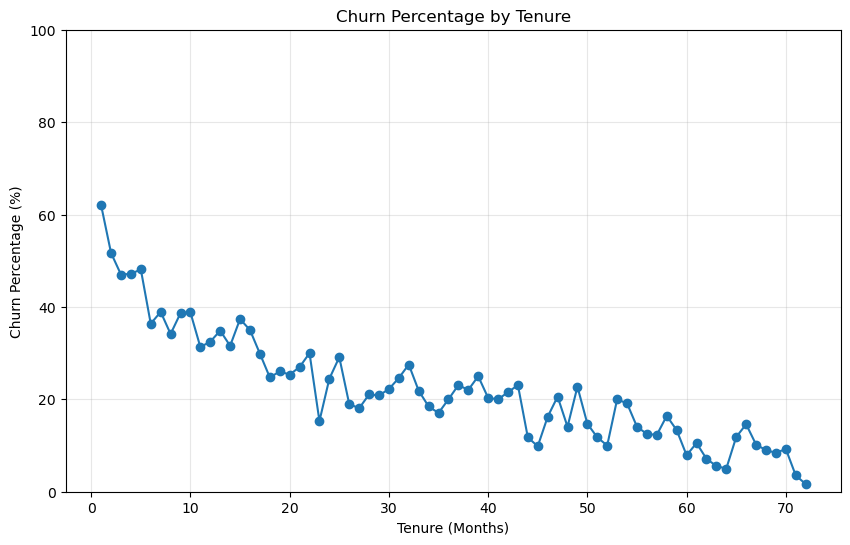

In [29]:
tenure_churn = df.groupby('tenure')['Churn'].value_counts().unstack().fillna(0)
churn_percentage = (tenure_churn['Yes'] / tenure_churn.sum(axis=1)) * 100

plt.figure(figsize=(10,6))
plt.plot(churn_percentage.index, churn_percentage.values, marker='o')
plt.ylabel("Churn Percentage (%)")
plt.xlabel("Tenure (Months)")
plt.title("Churn Percentage by Tenure")
plt.ylim(0, 100)
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\LOQ\AppData\Local\Temp\ipykernel_11608\1224771359.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('tenure_group')['Churn'].value_counts().unstack().fillna(0)


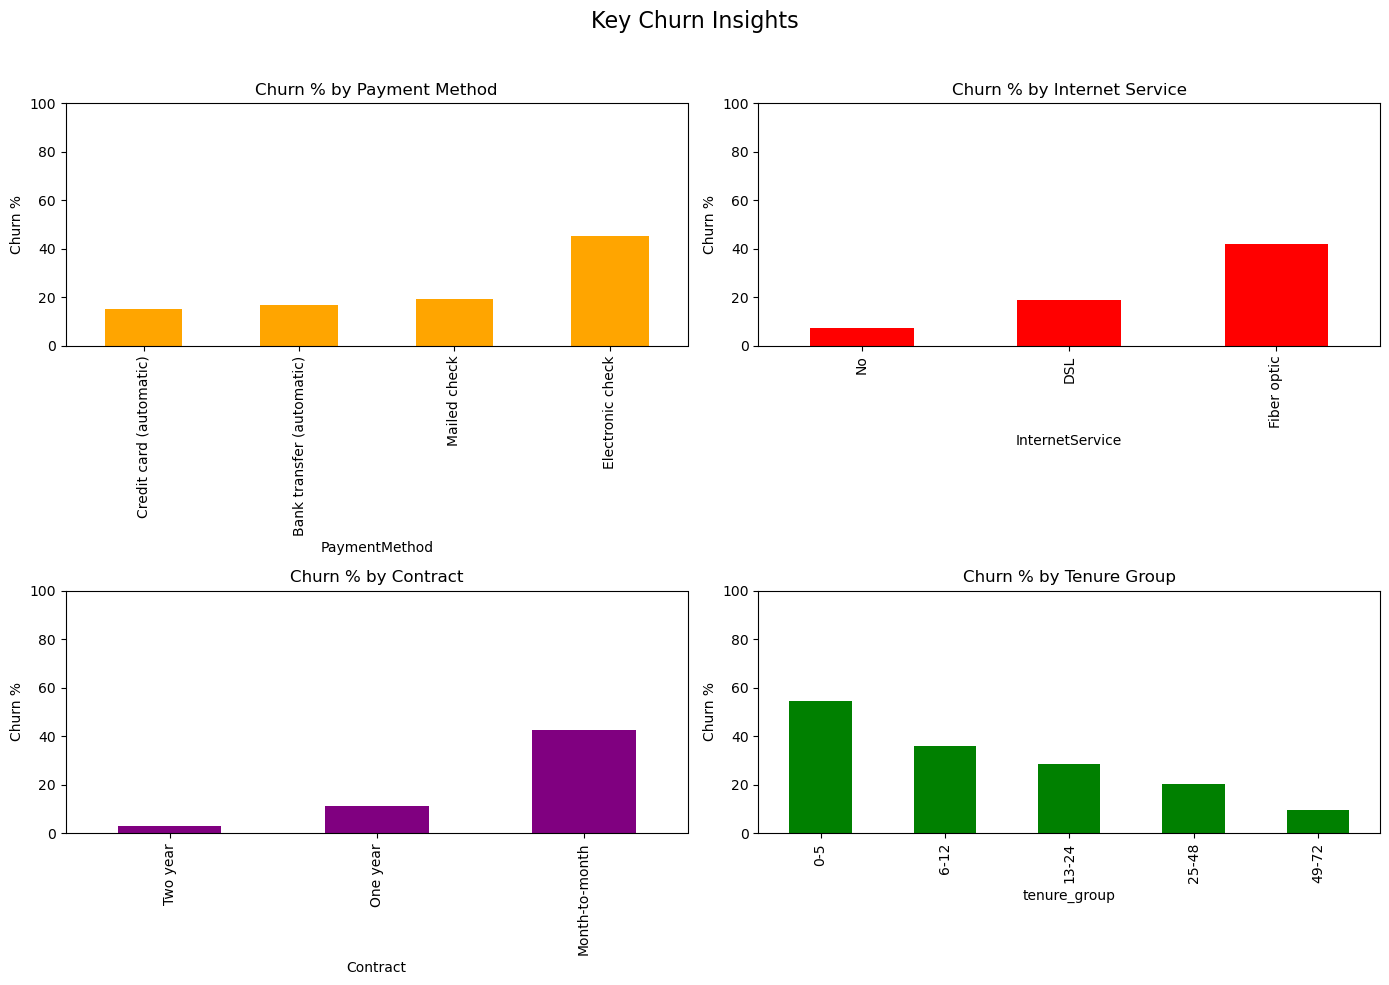

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Key Churn Insights", fontsize=16)

# 1) Churn % by Payment Method
payment_churn = df.groupby('PaymentMethod')['Churn'].value_counts().unstack().fillna(0)
payment_percentage = (payment_churn['Yes'] / payment_churn.sum(axis=1)) * 100
payment_percentage.sort_values().plot(kind='bar', ax=axes[0,0], color='orange')
axes[0,0].set_ylabel("Churn %")
axes[0,0].set_ylim(0, 100)
axes[0,0].set_title("Churn % by Payment Method")

# 2) Churn % by Internet Service
internet_churn = df.groupby('InternetService')['Churn'].value_counts().unstack().fillna(0)
internet_percentage = (internet_churn['Yes'] / internet_churn.sum(axis=1)) * 100
internet_percentage.sort_values().plot(kind='bar', ax=axes[0,1], color='red')
axes[0,1].set_ylabel("Churn %")
axes[0,1].set_ylim(0, 100)
axes[0,1].set_title("Churn % by Internet Service")

# 3) Churn % by Contract
contract_churn = df.groupby('Contract')['Churn'].value_counts().unstack().fillna(0)
contract_percentage = (contract_churn['Yes'] / contract_churn.sum(axis=1)) * 100
contract_percentage.sort_values().plot(kind='bar', ax=axes[1,0], color='purple')
axes[1,0].set_ylabel("Churn %")
axes[1,0].set_ylim(0, 100)
axes[1,0].set_title("Churn % by Contract")

# 4) Churn % by Tenure bins
bins = [0, 5, 12, 24, 48, 72]
labels = ['0-5', '6-12', '13-24', '25-48', '49-72']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)
tenure_churn = df.groupby('tenure_group')['Churn'].value_counts().unstack().fillna(0)
tenure_percentage = (tenure_churn['Yes'] / tenure_churn.sum(axis=1)) * 100
tenure_percentage.plot(kind='bar', ax=axes[1,1], color='green')
axes[1,1].set_ylabel("Churn %")
axes[1,1].set_ylim(0, 100)
axes[1,1].set_title("Churn % by Tenure Group")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

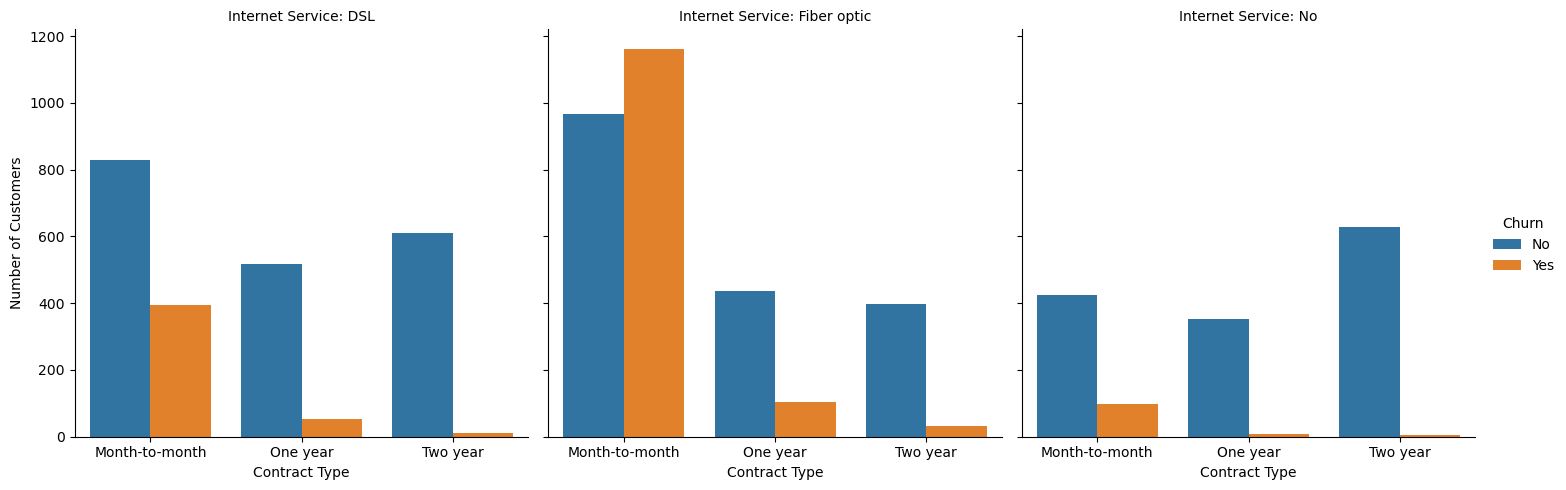

In [31]:
g = sns.catplot(
    data=df,x='Contract',hue='Churn',col='InternetService',kind='count',
    order=['Month-to-month', 'One year', 'Two year'],)
g.set_axis_labels("Contract Type", "Number of Customers")
g.set_titles("Internet Service: {col_name}")
plt.show()

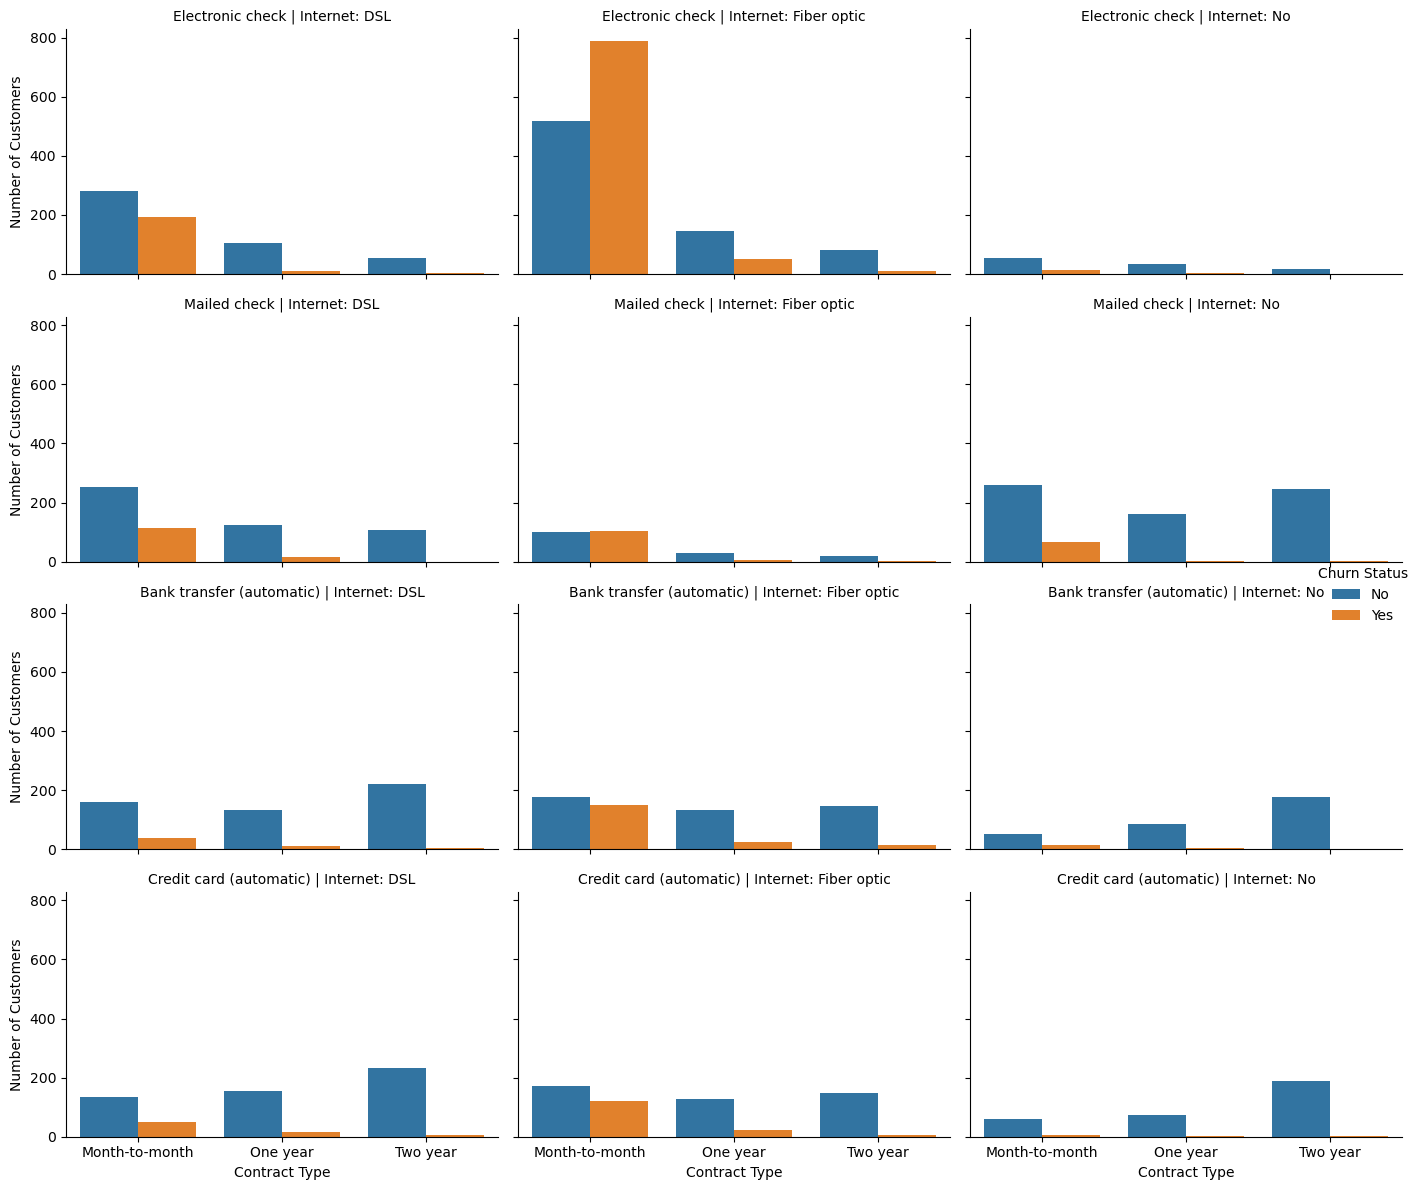

In [32]:
contract_order = ['Month-to-month', 'One year', 'Two year']

g = sns.catplot(
    data=df,
    x='Contract',
    hue='Churn',
    col='InternetService',
    row='PaymentMethod',
    kind='count',
    order=contract_order,
    height=3,  
    aspect=1.5
)

g.set_axis_labels("Contract Type", "Number of Customers")
g.set_titles("{row_name} | Internet: {col_name}")
g._legend.set_title("Churn Status")

plt.tight_layout()
plt.show()


In [59]:
# 1. churn rate by payment method (electronic check)
payment_counts = df.groupby('PaymentMethod')['Churn'].value_counts().unstack()
electronic_check_churn = payment_counts.loc['Electronic check', 'Yes']
electronic_check_total = payment_counts.loc['Electronic check'].sum()
electronic_check_rate = (electronic_check_churn / electronic_check_total) * 100

# 2. churn rate by Internet Service (Fiber Optic)
internet_counts = df.groupby('InternetService')['Churn'].value_counts().unstack()
fiber_churn = internet_counts.loc['Fiber optic', 'Yes']
fiber_total = internet_counts.loc['Fiber optic'].sum()
fiber_rate = (fiber_churn / fiber_total) * 100

# 3. churn rate by contract type (Month-to-month)
contract_counts = df.groupby('Contract')['Churn'].value_counts().unstack()
m2m_churn = contract_counts.loc['Month-to-month', 'Yes']
m2m_total = contract_counts.loc['Month-to-month'].sum()
m2m_rate = (m2m_churn / m2m_total) * 100

# 4. churn within first 5 months
first5_churn = df[(df['tenure'] <= 5) & (df['Churn'] == 'Yes')].shape[0]
total_churned = df[df['Churn'] == 'Yes'].shape[0]
first5_rate = (first5_churn / total_churned) * 100

# Print as Markdown
print(f"""
 Key Insights from Churn Analysis (with statistics):

1. Payment Method:
   - Electronic Check --> Churned: {electronic_check_churn} out of {electronic_check_total} customers --> {electronic_check_rate:.1f}% churn rate

2. Internet Service Type:
   - Fiber Optic --> Churned: {fiber_churn} out of {fiber_total} customers --> {fiber_rate:.1f}% churn rate

3. Contract Type:
   - Month-to-month --> Churned: {m2m_churn} out of {m2m_total} customers --> {m2m_rate:.1f}% churn rate

4. Tenure (Months):
   - Customers churned within first 5 months: {first5_churn} out of {total_churned} churned customers --> {first5_rate:.1f}%
""")



 Key Insights from Churn Analysis (with statistics):

1. Payment Method:
   - Electronic Check --> Churned: 1071 out of 2365 customers --> 45.3% churn rate

2. Internet Service Type:
   - Fiber Optic --> Churned: 1297 out of 3096 customers --> 41.9% churn rate

3. Contract Type:
   - Month-to-month --> Churned: 1655 out of 3875 customers --> 42.7% churn rate

4. Tenure (Months):
   - Customers churned within first 5 months: 744 out of 1869 churned customers --> 39.8%



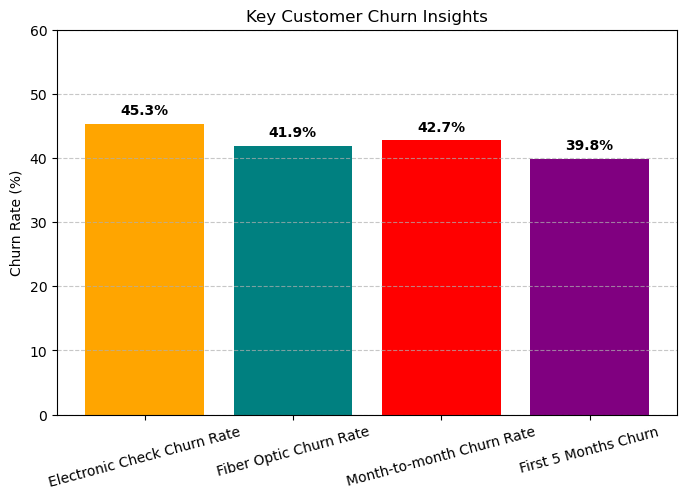

In [54]:
labels = [
    "Electronic Check Churn Rate",
    "Fiber Optic Churn Rate",
    "Month-to-month Churn Rate",
    "First 5 Months Churn"
]
values = [electronic_check_rate, fiber_rate, m2m_rate, first5_rate]

# Create bar plot
plt.figure(figsize=(8,5))
bars = plt.bar(labels, values, color=['orange', 'teal', 'red', 'purple'])

# Add value labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}%", 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize chart
plt.ylabel("Churn Rate (%)")
plt.title("Key Customer Churn Insights")
plt.ylim(0, 60)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Key Insights from Churn Analysis:
- Customers paying via **Electronic Check** have the highest churn rate (~45%).
- Customers with **Fiber Optic** internet have a churn rate above 40%.
- **Month-to-month contracts** are the most vulnerable to churn.
- Most churn happens within the **first 5 months** of the contract (~40% of churned customers).